# Auto Insurance Regression

Zbiór danych opisuje szwedzkie ubezpieczenia samochodowe. Istnieje pojedyncza wyjaśniająca, która jest liczbą szkód, a zmienną wyjaśnianą jest łączna kwota wypłat za szkody w tysiącach szwedzkich koron. Celem jest przewidywanie łącznej kwoty wypłat na podstawie liczby zgłoszonych szkód.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
dane = pd.read_csv("auto-insurance.csv", header=None, names=['nr_claims', 'payment'])
dane

,nr_claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [6]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nr_claims  63 non-null     int64  
 1   payment    63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
dane.describe()

,nr_claims,payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Rozkłady obu zmiennych mają mocno skośny rozkład (niesymetryczny) co może utrudniać zadanie modelowania, rozwiążemy ten problem później

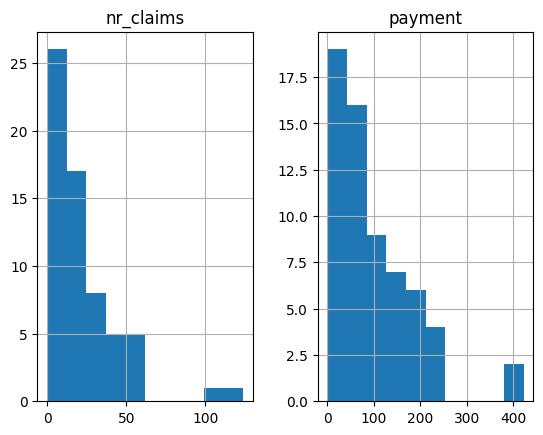

In [8]:
dane.hist()
plt.show()

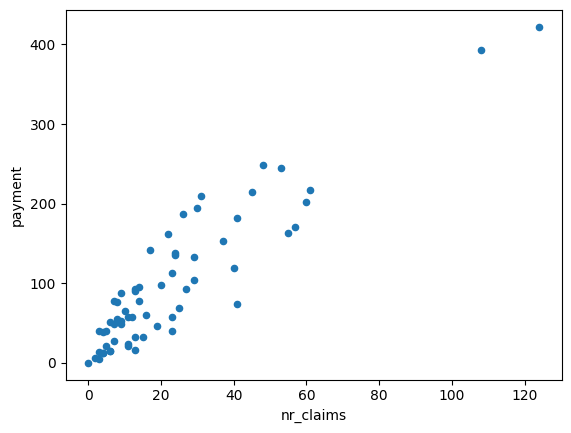

In [9]:
dane.plot.scatter(x='nr_claims', y='payment')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = dane["nr_claims"].values, dane.payment.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=222)

In [11]:
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

**ZADANIE.** Zbuduj model regresji liniowej i sprawdź błąd absolutny dla zbioru testowego.

In [19]:
# miejsce na rozwiązanie
model_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

mae_reg = mean_absolute_error(y_test, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae_reg:.2f}")



Mean Absolute Error (MAE): 28.06


**ZADANIE.** Stwórz model z jedną warstwą ukrytą z 10 neuronami, funkcją aktywacji 'relu' oraz kernel_initializer='he_normal'.

In [24]:
# miejsce na rozwiązanie
model = Sequential([
    Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    Dense(1)
])


model.compile(optimizer='adam', loss='msa', metrics=['maa'])


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

**ZADANIE** Skompiluj model z 'mse' jako funkcją straty i optymalizatorem 'adam'.

In [25]:
# miejsce na rozwiązanie
model = Sequential([
    Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

**ZADANIE.** Wytrenuj model ustawiając 100 epok, batch size 8 i validation_data=(X_test, y_test).

In [26]:
# miejsce na rozwiązanie
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4226.2246 - mae: 48.1850 - val_loss: 6025.8994 - val_mae: 59.3730
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3544.7400 - mae: 43.8327 - val_loss: 5814.0918 - val_mae: 58.4297
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4194.0889 - mae: 49.4431 - val_loss: 5607.6538 - val_mae: 57.4872
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3481.6416 - mae: 43.6643 - val_loss: 5406.6553 - val_mae: 56.5459
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3607.7998 - mae: 46.2893 - val_loss: 5213.7773 - val_mae: 55.6191
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2780.8848 - mae: 37.7491 - val_loss: 5033.2954 - val_mae: 54.7292
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3279.5234 - mae: 43.3077 - val_loss: 4843.6396 - val_mae: 53.7686
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3094.0508 - mae: 41.4697 - val_loss: 4671.0840 - val_mae: 52.9028
Epoch 9/

In [27]:
yhat = model.predict(X_test)
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MAE: 31.882


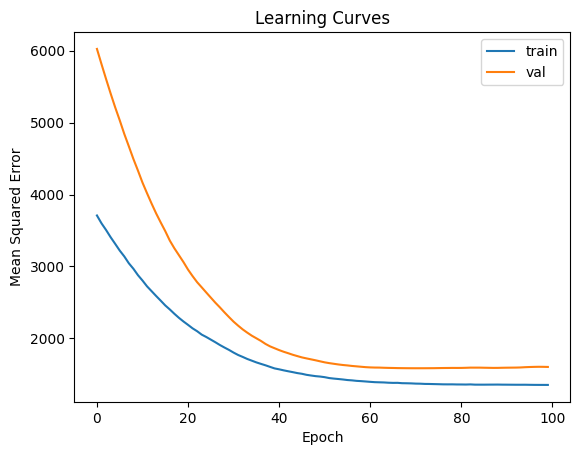

In [28]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Dokonamy teraz transformacji predyktora i zmiennej odpowiedzi i sprawdzimy czy polepszyło to naszą predykcję.

In [29]:
X_train, X_test = y_train.reshape((len(X_train),1)), y_test.reshape((len(X_test),1))
y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))

In [30]:
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [31]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(1,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, validation_data=(X_test,y_test))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3546 - val_loss: 0.9015
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3809 - val_loss: 0.7257
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3385 - val_loss: 0.5812
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2660 - val_loss: 0.4569
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1923 - val_loss: 0.3566
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1507 - val_loss: 0.2691
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0988 - val_loss: 0.2038
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0789 - val_loss: 0.1543
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0734 - val_loss: 0.1152
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - val_loss: 0.0846
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0288 - val_loss: 0.0597
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 - val_loss: 0.0433
Epoch 13/20

In [32]:
yhat = model.predict(X_test)
y_test = pt2.inverse_transform(y_test)
yhat = pt2.inverse_transform(yhat)
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
MAE: 0.094


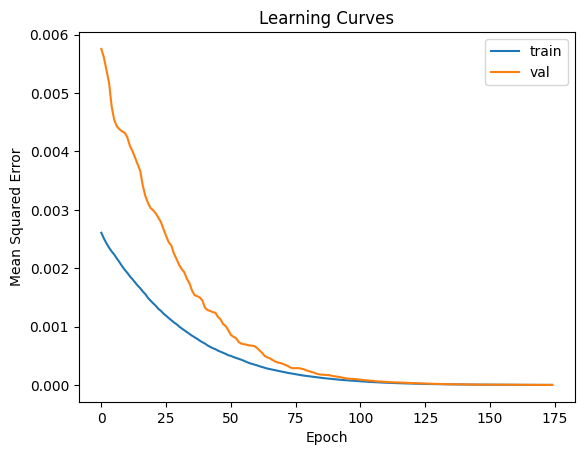

In [33]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'][25:], label='train')
plt.plot(history.history['val_loss'][25:], label='val')
plt.legend()
plt.show()

Zauważmy, że dzięki transformacjom udało nam się znacząco zmniejszyć błąd!

In [34]:
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

kfold = KFold(10)
scores = list()
for train_ix, test_ix in kfold.split(X, y):
    print(train_ix)
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]

    X_train, X_test = y_train.reshape((len(X_train),1)), y_test.reshape((len(X_test),1))
    y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))

    pt1 = PowerTransformer()
    pt1.fit(X_train)
    X_train = pt1.transform(X_train)
    X_test = pt1.transform(X_test)
    pt2 = PowerTransformer()
    pt2.fit(y_train)
    y_train = pt2.transform(y_train)
    y_test = pt2.transform(y_test)

    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0)

    yhat = model.predict(X_test)
    y_test = pt2.inverse_transform(y_test)
    yhat = pt2.inverse_transform(yhat)

    score = mean_absolute_error(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>0.987
[ 0  1  2  3  4  5  6 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>1.468
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


>3.946
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


>1.866
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>3.042
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>0.037
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>0.277
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 51 52 53
 54 55 56 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>0.550
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 57 58 59 60 61 62]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
>0.788
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>1.394
Mean MAE: 1.436 (1.174)
